# Regularization and Gradient Descent Exercises



# Learning Objectives

- Explain cost functions, regularization, feature selection, and hyper-parameters
- Summarize complex statistical optimization algorithms like gradient descent and its application to linear regression
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code after importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.

In [ ]:
!pip install scikit-learn-intelex #Only needed for Colab
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearnex import patch_sklearn
patch_sklearn()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 12.0 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Question 1

* Import the data.

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [ ]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])
data = pd.read_csv(filepath)

#Generate the ground truth and plot sparse data
x_real = np.linspace(0, 1.0, 100)
y_real = np.sin(2 * np.pi * x_real)



##Explanation of `Y_real = np.sin(2 * np.pi * X_real)`

np.sin(): This is a NumPy function that calculates the sine of an array of values, element-wise. The sine function is a well-known periodic function used to model wave-like features.

2 * np.pi: This is a constant that represents 2π, which is the period of the sine function. In other words, the sine function completes one full cycle every 2π radians.

X_real: This is an array of x-values that are linearly spaced between two endpoints. In the context of this tutorial, it likely represents a range of x-values from 0 to 1.

2 * np.pi * X_real: This term scales the X_real values to cover a full cycle of the sine wave. If X_real goes from 0 to 1, then 2 * np.pi * X_real goes from 0 to 2π, which means you get a full sine wave cycle.

Putting it all together, for each value of X_real, you calculate its sine after scaling it to match the 2π periodicity of the sine wave. The result, Y_real, is a smooth sine wave that can be used as the 'true' function for comparison with other data, such as noisy observations or predictions from a model.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

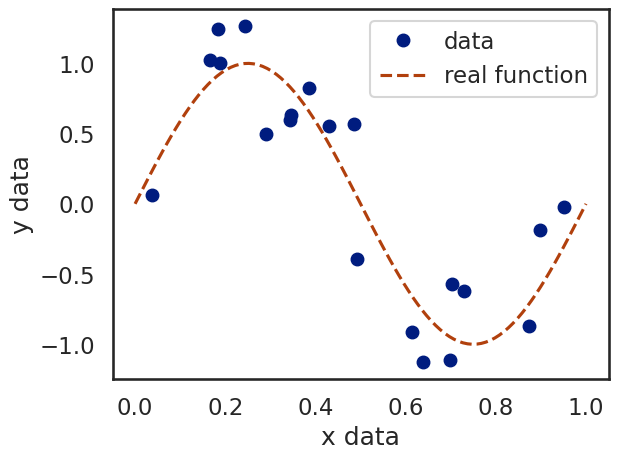

In [ ]:
# Configure Seaborn: set plot background to white, scale elements for a presentation context, and use a dark color palette for plot elements

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse) data
ax = data.set_index('x')['y'].plot(ls='', marker= 'o', label= 'data')
ax.plot(x_real, y_real, ls= '--', marker= '', label= 'real function')

ax.legend()
ax.set(xlabel='x data', ylabel= 'y data')



##Question 1 Summary: Importing and Plotting Data
Here, you're loading the provided sparse dataset and generating a dense "ground truth" dataset using the known sinusoidal relationship. Plotting both datasets allows you to visualize how well the sparse data represents the underlying function and the amount of noise present.

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression.
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

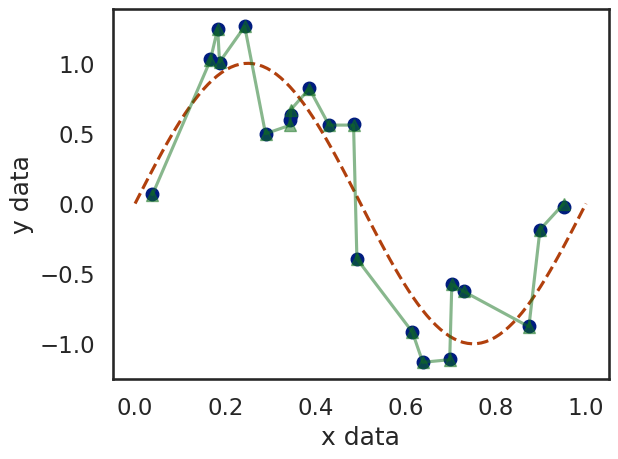

In [ ]:
# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe
x_data = data[['x']].to_numpy()
y_data = data['y'].to_numpy()

# Create the features and fit the model
x_poly = pf.fit_transform(x_data)
lr = lr.fit(x_poly, y_data)
y_pred = lr.predict(x_poly)

# Plot the result
plt.plot(x_data, y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(x_real, y_real, ls='--', label='real function')
plt.plot(x_data, y_pred, marker='^', alpha=0.5, label='predictions w/ polynomial features')
#plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')


##Question 2 Summary: Polynomial Features and Linear Regression
This step demonstrates overfitting. You're creating 20th order polynomial features, which will allow a Linear Regression model to fit the sparse data very closely. However, because the model is so complex, it's likely to fit the noise rather than the underlying relationship. The plot helps visualize this overfitting.


## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
* Plot the results, as was done in Question 1.
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

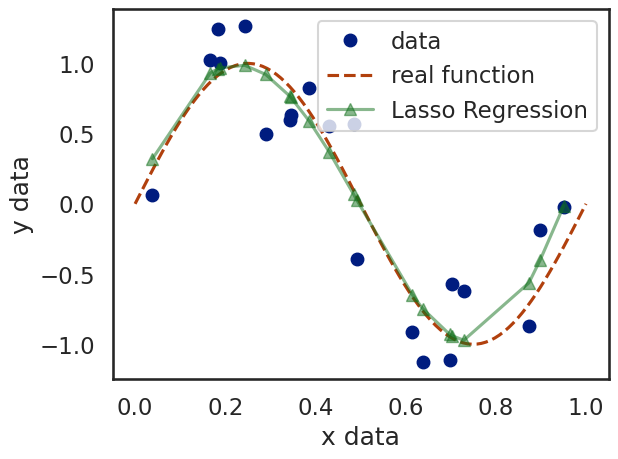

In [ ]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

# The ridge regression model
rr = Ridge(alpha=0.0001)
rr = rr.fit(x_poly, y_data)
y_pred_rr = rr.predict(x_poly)

# The lasso regression model
lassor = Lasso(alpha=0.00001)
lassor = lassor.fit(x_poly, y_data)
y_pred_lassor = lassor.predict(x_poly)

# The plot of the predicted values

plt.plot(x_data, y_data, marker='o', ls='', label='data')#, alpha=1)
plt.plot(x_real, y_real, ls='--', label='real function')

#plt.plot(x_data, y_pred, label='linear regression', marker='^', alpha=0.5)
#plt.plot(x_data, y_pred_rr, label='Ridge Regression', marker='^', alpha=0.5)
plt.plot(x_data, y_pred_lassor, label='Lasso Regression', marker='^', alpha=0.5)

plt.legend()

#Use gca() to 'Get Current Axis' and assign it to ax
ax = plt.gca()
ax.set(xlabel='x data', ylabel= 'y data')


In [ ]:
# let's look at the absolute value of coefficients for each model
# .ravel returns a contiguous flattened array.
coeffecients = pd.DataFrame()
coeffecients['linear regression'] = lr.coef_.ravel()
coeffecients['ridge regression'] = rr.coef_.ravel()
coeffecients['lasso regression'] = lassor.coef_.ravel()

#.applymap() applies a given function to every single element of the DataFrame
coeffecients = coeffecients.applymap(abs)

# Huge difference in scale between non-regularized vs regularized regression
coeffecients.describe()


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.786341e+13,4.545873,2.516395
std,6.005692e+13,5.094313,5.070057
min,1.613907e+07,0.000000,0.000000
25%,3.407774e+12,2.010479,0.140855
50%,3.625543e+13,3.259910,0.596761
75%,1.068105e+14,4.539545,2.472102
max,1.650270e+14,23.075093,22.085728


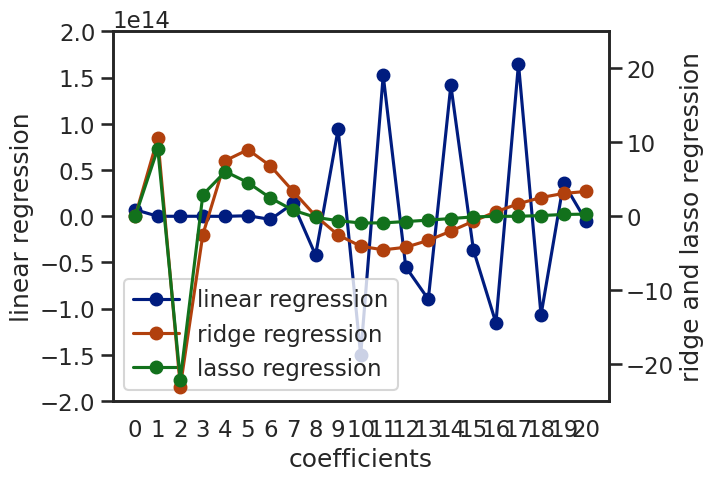

In [ ]:
#Get a reference to the Seaborn colour palette
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(),
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(),
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(),
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

##Question 3 Summary: Regularization with Ridge and Lasso Regression
Regularization is used to prevent overfitting by penalizing large coefficients in the model. Ridge (L2 regularization) and Lasso (L1 regularization) are two methods of doing this. By setting a regularization parameter (alpha), you control the strength of the penalty. The tutorial asks you to plot the results of these regression methods compared to the linear regression to see the effect of regularization.

The magnitude of the coefficients plot shows how regularization shrinks the coefficients towards zero (more so for Lasso), which in turn reduces overfitting. By comparing the coefficients' magnitude from linear regression with ridge and lasso regression, you can see the effect of regularization in controlling the model complexity.

In summary, the Questions 1 - 4 walk through the process of fitting increasingly complex models to data and then using regularization to mitigate the risk of overfitting. It's a practical exercise showing why complex models are not always better and how regularization can help build more generalizable models.


## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets.
* Log transform skewed features.
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [ ]:
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep=',')

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)

Next, split the data in train and test data sets.

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [ ]:
# Create a list of float columns to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

Calculate skew_cols, which is a DataFrame that contains only the columns whose absolute skewness exceeds the threshold of 0.75, sorted by skewness in descending order. This is  done to identify features that may need to be transformed to have a more Gaussian, or normal, distribution, which many machine learning models assume

In [ ]:
#Calculate Skew
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


from matplotlib import pyplot as plt
skew_cols['Skew'].plot(kind='hist', bins=20, title='Skew')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
skew_cols['Skew'].plot(kind='line', figsize=(8, 4), title='Skew')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['Skew'].plot(kind='hist', bins=20, title='Skew')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Skew'].plot(kind='line', figsize=(8, 4), title='Skew')
plt.gca().spines[['top', 'right']].set_visible(False)

Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

In [ ]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.



In [ ]:
# Mute the setting wtih a copy warnings



Separate features from predictor.

In [ ]:
#Separate features from predictor.
feature_cols = [x for x in train.columns if x != 'SalePrice']
x_train = train[feature_cols].to_numpy()
y_train = train['SalePrice'].to_numpy()
x_test = test[feature_cols].to_numpy()
y_test = test['SalePrice'].to_numpy()


##Question 4 Summary: Data Preprocessing
This step involves preparing the data for modelling. One-hot encoding is used to convert categorical variables into a form that could be provided to machine learning algorithms to do a better job in prediction. Splitting the data into train and test sets helps in validating the model's performance on unseen data. Log-transforming skewed features helps in stabilizing the variance and making the data conform more closely to the normal distribution, which can improve the performance of some models.


## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [ ]:
#Define the rmse function
def rmse(ytrue, ypredicted):
  return np.sqrt(mean_squared_error(ytrue, ypredicted))


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [ ]:
#Fit a basic linear regression model

linearRegression = LinearRegression().fit(x_train, y_train)

#print the root-mean-squared error for this model

linearRegression_rmse = rmse(y_test, linearRegression.predict(x_test))
print(linearRegression_rmse)


326275232.89081883


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 582933.0),
 (0.0, 582933.0),
 Text(0.5, 1.0, 'Linear Regression Results')]

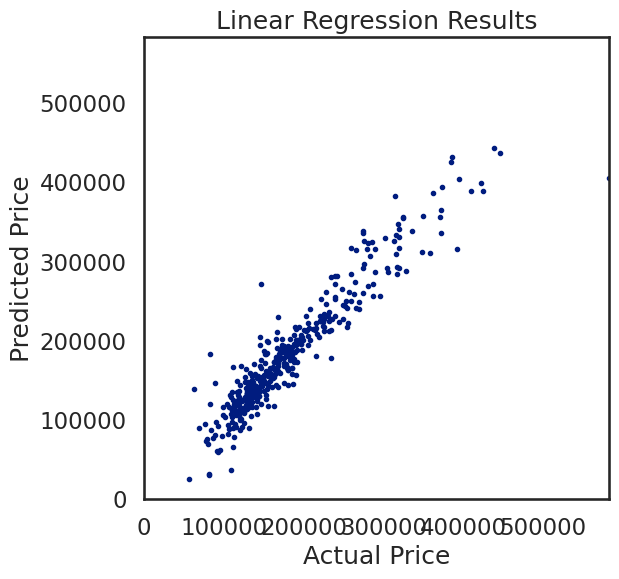

In [ ]:
#plot the predicted vs actual sale price based on the model.
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(x_test),
        marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim = lim,
       ylim = lim,
       title='Linear Regression Results')


##Question 5 Summary: Basic Linear Regression
After preprocessing the data, a basic linear regression model is fit to the training data. The RMSE is a measure of the difference between values predicted by a model and the values actually observed from the environment that is being modelled. A lower RMSE indicates a better fit. The plot of predicted vs actual sale prices gives a visual indication of the model's accuracy.


## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [ ]:
#Ridge regression
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(x_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(x_test))

print(ridgeCV.alpha_, ridgeCV_rmse)


15.0 33456.00133585838


##Question 6 Summary: Ridge Regression
Ridge regression is used to prevent overfitting by adding a penalty to the size of coefficients. Cross-validation is used to select the best value of α (alpha), which controls the strength of the penalty. The RMSE is calculated for different values of alpha to determine the best model. RidgeCV automates this process by using built-in cross-validation to find the optimal alpha value.


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [ ]:
#Lasso Cross Validation
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])
lassoCV = LassoCV(alphas=alphas2, max_iter= 50000, cv=3).fit(x_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(x_test))

print(lassoCV.alpha_, lassoCV_rmse)


1e-05 64105.960447727826


One of the consequences of this regularization is that it can lead to some coefficients being exactly zero when the penalty is high enough, which means those features do not contribute to the model.

We can determine how many of these features remain non-zero.

In [ ]:
#Determine non-zero features



Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [ ]:
#ElasticNet Cross Validation



Comparing the RMSE calculation from all models is easiest in a table.

In [ ]:
#Compare RMSE values



We can also make a plot of actual vs predicted housing prices as before.

In [ ]:
#Plot of Actual vs Predicated Prices



##Question 7 Summary: Lasso and Elastic Net Regression
Lasso regression also adds a penalty for overfitting, but in a way that can lead to sparse models with fewer coefficients; some can become zero and hence eliminated. Elastic Net is a compromise between Lasso and Ridge, incorporating both L1 and L2 regularization, which can be controlled with the l1_ratio. Cross-validation is used again to find the best values of α and l1_ratio. Comparing the RMSE of Lasso and Elastic Net models helps to understand their performance.


## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

In [ ]:
# Import SGDRegressor and prepare the parameters



Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`, which sets the learning rate to a very small number (0.0000001).
* Re-compute the errors for all the penalties and compare.

In [ ]:
# Import SGDRegressor and prepare the parameters



Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`.
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

In [ ]:
#Scale trianing data



In [ ]:
#Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.
#Scale trianing data



##Question 8 Summary: Stochastic Gradient Descent (SGD)
SGD is an optimization technique that can be used for fitting linear models. It's particularly useful when the dataset is too large to fit in memory. The tutorial explores the effect of different regularization penalties (None, L2, L1, and Elastic Net) on the SGD algorithm's performance. The results indicate that without proper scaling of the data, the SGD algorithm can diverge, resulting in very high RMSE values. Adjusting the learning rate and scaling the data using MinMaxScaler can help the SGD algorithm converge to a better solution. The RMSE values after these adjustments provide a comparison of how each regularization technique affects the SGD performance.
In summary, this tutorial covers key concepts and techniques in regression analysis and demonstrates the importance of regularization, data preprocessing, and proper model validation. Each step builds on the previous one, showing the incremental improvements and how different strategies can be applied to develop a robust predictive model.
